# Climate Change and Deaths from Cancer Analysis

In this analysis, we would like to see the correlation between climate change and deaths from Cancer, specifically at the top 5 countries with the highest population in the world.
1. China
2. India
3. United States
4. Indonesia
5. Brazil

In [1]:
%matplotlib inline

In [3]:
# Dependencies and Set Up
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt


In [4]:
# Read csv for temperature by countries from 1991 to 2016
temp_china = pd.read_csv("./Resources/temperature_1991_2016_China.csv")
temp_india = pd.read_csv("./Resources/temperature_1991_2016_India.csv")
temp_usa = pd.read_csv("./Resources/temperature_1991_2016_USA.csv")
temp_indonesia = pd.read_csv("./Resources/temperature_1991_2016_Indonesia.csv")
temp_brazil = pd.read_csv("./Resources/temperature_1991_2016_Brazil.csv")


In [5]:
# Check and print the temperature data (China)
temp_china.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-8.05810,1991,Jan Average,China,CHN
1,-4.63730,1991,Feb Average,China,CHN
2,0.59422,1991,Mar Average,China,CHN
3,7.42692,1991,Apr Average,China,CHN
4,13.00760,1991,May Average,China,CHN


In [6]:
# Check and print the temperature data (India)
temp_india.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,16.6354,1991,Jan Average,India,IND
1,19.9880,1991,Feb Average,India,IND
2,24.1397,1991,Mar Average,India,IND
3,27.3468,1991,Apr Average,India,IND
4,30.1960,1991,May Average,India,IND


In [7]:
# Check and print the temperature data (USA)
temp_usa.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-5.99380,1991,Jan Average,United States,USA
1,-1.45230,1991,Feb Average,United States,USA
2,0.93311,1991,Mar Average,United States,USA
3,7.22711,1991,Apr Average,United States,USA
4,13.45700,1991,May Average,United States,USA


In [8]:
# Check and print the temperature data (Indonesia)
temp_indonesia.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,25.9220,1991,Jan Average,Indonesia,IDN
1,25.8220,1991,Feb Average,Indonesia,IDN
2,26.2723,1991,Mar Average,Indonesia,IDN
3,26.4782,1991,Apr Average,Indonesia,IDN
4,26.2828,1991,May Average,Indonesia,IDN


In [9]:
# Check and print the temperature data (Brazil)
temp_brazil.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,25.6309,1991,Jan Average,Brazil,BRA
1,25.9331,1991,Feb Average,Brazil,BRA
2,25.6195,1991,Mar Average,Brazil,BRA
3,25.3122,1991,Apr Average,Brazil,BRA
4,24.6685,1991,May Average,Brazil,BRA


In [10]:
# Read the csv for the annual CO2 emission by country
CO2_emission = pd.read_csv("./Resources/annual_co2_emissions_by_region.csv")
CO2_emission.head()

,Entity,Code,Year,Annual CO2 emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [11]:
# Rename the column name
CO2_emission = CO2_emission.rename(
    columns = {"Entity": "Country", "Annual CO2 emissions (tonnes )": "CO2 emissions (tonnes)"})
CO2_emission.head()

,Country,Code,Year,CO2 emissions (tonnes)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [12]:
# Extract only China data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_china = CO2_emission.loc[(CO2_emission["Country"] == "China"), columns]
CO2_emission_china.head()

,Country,Year,CO2 emissions (tonnes)
4231,China,1751,0.0
4232,China,1752,0.0
4233,China,1753,0.0
4234,China,1754,0.0
4235,China,1755,0.0


In [13]:
# Extract China data for 1991 to 2016 only
CO2_emission_china = CO2_emission_china.set_index("Year")

years = np.arange(1991, 2017, 1)

years_91_16 = []

for year in years:
    years_91_16.append(year)
    
# years_91_16

CO2_emission_china = CO2_emission_china.loc[years_91_16]
CO2_emission_china.head(15)

,Country,CO2 emissions (tonnes)
Year,,
1991,China,2.538924e+09
1992,China,2.657112e+09
1993,China,2.835795e+09
1994,China,3.010242e+09
1995,China,3.265057e+09
1996,China,3.408347e+09
1997,China,3.414549e+09
1998,China,3.265903e+09
1999,China,3.258135e+09


In [14]:
# Extract only India data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_india = CO2_emission.loc[(CO2_emission["Country"] == "India"), columns]
CO2_emission_india.head()

,Country,Year,CO2 emissions (tonnes)
9204,India,1751,0.0
9205,India,1752,0.0
9206,India,1753,0.0
9207,India,1754,0.0
9208,India,1755,0.0


In [15]:
# Extract India data for 1991 to 2016 only
CO2_emission_india = CO2_emission_india.set_index("Year")

CO2_emission_india = CO2_emission_india.loc[years_91_16]
CO2_emission_india.head(15)

,Country,CO2 emissions (tonnes)
Year,,
1991,India,6.567409e+08
1992,India,6.987569e+08
1993,India,7.228943e+08
1994,India,7.642420e+08
1995,India,8.114608e+08
1996,India,8.788270e+08
1997,India,9.150493e+08
1998,India,9.335493e+08
1999,India,9.952331e+08


In [16]:
# Extract only United States data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_usa = CO2_emission.loc[(CO2_emission["Country"] == "United States"), columns]
CO2_emission_usa.head()

,Country,Year,CO2 emissions (tonnes)
19661,United States,1751,0.0
19662,United States,1752,0.0
19663,United States,1753,0.0
19664,United States,1754,0.0
19665,United States,1755,0.0


In [17]:
# Extract United States data for 1991 to 2016 only
CO2_emission_usa = CO2_emission_usa.set_index("Year")

CO2_emission_usa = CO2_emission_usa.loc[years_91_16]
CO2_emission_usa.head(15)

,Country,CO2 emissions (tonnes)
Year,,
1991,United States,5.070839e+09
1992,United States,5.174059e+09
1993,United States,5.284688e+09
1994,United States,5.377987e+09
1995,United States,5.439213e+09
1996,United States,5.626187e+09
1997,United States,5.703891e+09
1998,United States,5.752324e+09
1999,United States,5.832250e+09


In [18]:
# Extract only Indonesia data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_indonesia = CO2_emission.loc[(CO2_emission["Country"] == "Indonesia"), columns]
CO2_emission_indonesia.head()

,Country,Year,CO2 emissions (tonnes)
9460,Indonesia,1889,3664.0
9461,Indonesia,1890,14656.0
9462,Indonesia,1891,21984.0
9463,Indonesia,1892,179536.0
9464,Indonesia,1893,403040.0


In [19]:
# Extract Indonesia data for 1991 to 2016 only
CO2_emission_indonesia = CO2_emission_indonesia.set_index("Year")

CO2_emission_indonesia = CO2_emission_indonesia.loc[years_91_16]
CO2_emission_indonesia.head(15)

,Country,CO2 emissions (tonnes)
Year,,
1991,Indonesia,180695289.5
1992,Indonesia,203659373.7
1993,Indonesia,219856328.5
1994,Indonesia,222967641.4
1995,Indonesia,226669943.6
1996,Indonesia,255207090.1
1997,Indonesia,280896520.2
1998,Indonesia,216104916.5
1999,Indonesia,244101581.6


In [20]:
# Extract only Brazil data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_brazil = CO2_emission.loc[(CO2_emission["Country"] == "Brazil"), columns]
CO2_emission_brazil.head()

,Country,Year,CO2 emissions (tonnes)
2980,Brazil,1901,2103136.0
2981,Brazil,1902,2506176.0
2982,Brazil,1903,2440224.0
2983,Brazil,1904,2619760.0
2984,Brazil,1905,2799296.0


In [21]:
# Extract Brazil data for 1991 to 2016 only
CO2_emission_brazil = CO2_emission_brazil.set_index("Year")

CO2_emission_brazil = CO2_emission_brazil.loc[years_91_16]
CO2_emission_brazil.head(15)

,Country,CO2 emissions (tonnes)
Year,,
1991,Brazil,217227472.0
1992,Brazil,218383504.0
1993,Brazil,228333216.0
1994,Brazil,239470720.0
1995,Brazil,255583376.0
1996,Brazil,281194784.0
1997,Brazil,296585256.0
1998,Brazil,308305720.0
1999,Brazil,316282440.0


In [22]:
# Read the csv for total cancer deaths by cancer types
cancer_deaths = pd.read_csv("./Resources/total_cancer_deaths_by_type.csv")
cancer_deaths.head()

,Entity,Code,Year,Liver cancer (deaths),Kidney cancer (deaths),Larynx cancer (deaths),Breast cancer (deaths),Thyroid cancer (deaths),Stomach cancer (deaths),Bladder cancer (deaths),...,Lip and oral cavity cancer (deaths),Brain and nervous system cancer (deaths),"Tracheal, bronchus, and lung cancer (deaths)",Gallbladder and biliary tract cancer (deaths),Malignant skin melanoma (deaths),Leukemia (deaths),Hodgkin lymphoma (deaths),Multiple myeloma (deaths),Other cancers (deaths),Non-Hodgkin lymphoma (deaths)
0,Afghanistan,AFG,1990,466.253436,80.073955,290.099710,566.064939,55.237646,2539.307228,215.632714,...,94.797076,436.803024,956.571414,158.643663,38.136505,755.346768,148.044214,73.421959,14.700016,172.0
1,Afghanistan,AFG,1991,464.137333,79.617930,293.578079,569.733770,55.733210,2578.463804,218.264694,...,96.200684,440.421855,957.902832,160.305013,38.851810,766.950668,151.982681,74.062465,14.942015,183.0
2,Afghanistan,AFG,1992,471.634765,81.300485,303.083772,596.596603,58.219683,2681.232717,223.783862,...,99.492049,473.142029,971.879501,164.741624,40.982141,826.257248,168.151360,75.965459,15.704282,197.0
3,Afghanistan,AFG,1993,480.629105,84.770448,314.296364,626.891389,61.200264,2804.991395,230.028721,...,103.130549,524.190466,986.257891,169.337997,43.499451,915.423760,188.783361,77.835488,16.748916,215.0
4,Afghanistan,AFG,1994,482.489934,87.711539,322.791026,642.000188,62.795340,2904.039548,234.441256,...,105.411865,562.052598,992.539360,172.063135,44.983330,973.560759,199.535545,78.774421,17.406808,232.0


In [24]:
# Seeing the list of column names
list(cancer_deaths.columns)

['Entity',
 'Code',
 'Year',
 'Liver cancer (deaths)',
 'Kidney cancer (deaths)',
 'Larynx cancer (deaths)',
 'Breast cancer (deaths)',
 'Thyroid cancer (deaths)',
 'Stomach cancer (deaths)',
 'Bladder cancer (deaths)',
 'Uterine cancer (deaths)',
 'Ovarian cancer (deaths)',
 'Cervical cancer (deaths)',
 'Prostate cancer (deaths)',
 'Pancreatic cancer (deaths)',
 'Esophageal cancer (deaths)',
 'Testicular cancer (deaths)',
 'Nasopharynx cancer (deaths)',
 'Other pharynx cancer (deaths)',
 'Colon and rectum cancer (deaths)',
 'Non-melanoma skin cancer (deaths)',
 'Lip and oral cavity cancer (deaths)',
 'Brain and nervous system cancer (deaths)',
 'Tracheal, bronchus, and lung cancer (deaths)',
 'Gallbladder and biliary tract cancer (deaths)',
 'Malignant skin melanoma (deaths)',
 'Leukemia (deaths)',
 'Hodgkin lymphoma (deaths)',
 'Multiple myeloma (deaths)',
 'Other cancers (deaths)',
 'Non-Hodgkin lymphoma (deaths)']

In [27]:
# Extracting the columns for Country/Entity, Year, and deaths because of lung cancer
lung_cancer_deaths = cancer_deaths.loc[:, ["Entity", "Year", "Tracheal, bronchus, and lung cancer (deaths)"]]
lung_cancer_deaths.head()

,Entity,Year,"Tracheal, bronchus, and lung cancer (deaths)"
0,Afghanistan,1990,956.571414
1,Afghanistan,1991,957.902832
2,Afghanistan,1992,971.879501
3,Afghanistan,1993,986.257891
4,Afghanistan,1994,992.539360


In [29]:
# Rename the column name
lung_cancer_deaths = lung_cancer_deaths.rename(columns = {"Entity": "Country"})
lung_cancer_deaths.head()

,Country,Year,"Tracheal, bronchus, and lung cancer (deaths)"
0,Afghanistan,1990,956.571414
1,Afghanistan,1991,957.902832
2,Afghanistan,1992,971.879501
3,Afghanistan,1993,986.257891
4,Afghanistan,1994,992.539360


In [30]:
# Extract the deaths caused by lung cancer for China only
lung_cancer_deaths_china = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "China"]

# Set index as year and extract the deaths caused by lung cancer in China for year 1991 to 2016 only
lung_cancer_deaths_china = lung_cancer_deaths_china.set_index("Year")
lung_cancer_deaths_china = lung_cancer_deaths_china.loc[years_91_16]

lung_cancer_deaths_china.head(15)


,Country,"Tracheal, bronchus, and lung cancer (deaths)"
Year,,
1991,China,247859.469602
1992,China,253971.277147
1993,China,262381.970584
1994,China,271850.924610
1995,China,283799.253508
1996,China,295892.292765
1997,China,306248.837446
1998,China,318104.861596
1999,China,330702.058709


In [31]:
# Extract the deaths caused by lung cancer for India only
lung_cancer_deaths_india = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "India"]

# Set index as year and extract the deaths caused by lung cancer in India for year 1991 to 2016 only
lung_cancer_deaths_india = lung_cancer_deaths_india.set_index("Year")
lung_cancer_deaths_india = lung_cancer_deaths_india.loc[years_91_16]

lung_cancer_deaths_india.head(15)

,Country,"Tracheal, bronchus, and lung cancer (deaths)"
Year,,
1991,India,34477.975624
1992,India,35339.353411
1993,India,35947.473684
1994,India,36522.333651
1995,India,36995.186371
1996,India,38461.422220
1997,India,41171.042517
1998,India,41988.821040
1999,India,41943.722850


In [34]:
# Extract the deaths caused by lung cancer for United States only
lung_cancer_deaths_usa = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "United States"]

# Set index as year and extract the deaths caused by lung cancer in United States for year 1991 to 2016 only
lung_cancer_deaths_usa = lung_cancer_deaths_usa.set_index("Year")
lung_cancer_deaths_usa = lung_cancer_deaths_usa.loc[years_91_16]

lung_cancer_deaths_usa.head(15)

,Country,"Tracheal, bronchus, and lung cancer (deaths)"
Year,,
1991,United States,155568.287806
1992,United States,157296.383782
1993,United States,162555.316866
1994,United States,164345.996485
1995,United States,167320.647505
1996,United States,167299.135628
1997,United States,167331.866462
1998,United States,168359.185719
1999,United States,170128.401449


In [35]:
# Extract the deaths caused by lung cancer for Indonesia only
lung_cancer_deaths_indonesia = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "Indonesia"]

# Set index as year and extract the deaths caused by lung cancer in Indonesia for year 1991 to 2016 only
lung_cancer_deaths_indonesia = lung_cancer_deaths_indonesia.set_index("Year")
lung_cancer_deaths_indonesia = lung_cancer_deaths_indonesia.loc[years_91_16]

lung_cancer_deaths_indonesia.head(15)

,Country,"Tracheal, bronchus, and lung cancer (deaths)"
Year,,
1991,Indonesia,16413.039790
1992,Indonesia,17120.422992
1993,Indonesia,17791.908037
1994,Indonesia,18455.321480
1995,Indonesia,19150.554845
1996,Indonesia,19941.348825
1997,Indonesia,20718.031298
1998,Indonesia,21332.321455
1999,Indonesia,22026.501119


In [36]:
# Extract the deaths caused by lung cancer for Brazil only
lung_cancer_deaths_brazil = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "Brazil"]

# Set index as year and extract the deaths caused by lung cancer in Brazil for year 1991 to 2016 only
lung_cancer_deaths_brazil = lung_cancer_deaths_brazil.set_index("Year")
lung_cancer_deaths_brazil = lung_cancer_deaths_brazil.loc[years_91_16]

lung_cancer_deaths_brazil.head(15)

,Country,"Tracheal, bronchus, and lung cancer (deaths)"
Year,,
1991,Brazil,14438.677779
1992,Brazil,15093.238904
1993,Brazil,15920.998405
1994,Brazil,16473.979603
1995,Brazil,16993.900398
1996,Brazil,17659.680749
1997,Brazil,18331.067602
1998,Brazil,19117.384264
1999,Brazil,19966.091616


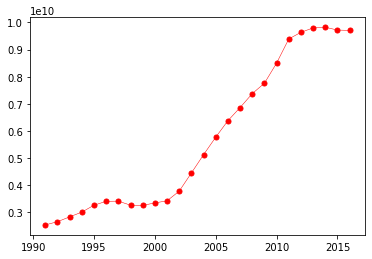

In [42]:
# Plot the graph based on CO2 emission data for China
plt.plot(CO2_emission_china.index, CO2_emission_china["CO2 emissions (tonnes)"], 
         color="red", marker="o", markersize=5, linewidth=0.5)

plt.show()

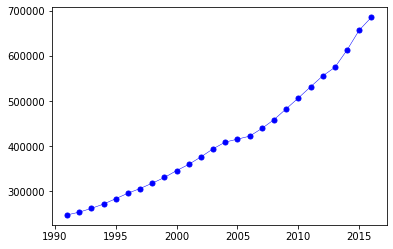

In [41]:
# Plot the graph based on lung cancer deaths data for China 
plt.plot(lung_cancer_deaths_china.index, lung_cancer_deaths_china["Tracheal, bronchus, and lung cancer (deaths)"],
        color="blue", marker="o", markersize=5, linewidth=0.5)
plt.show()

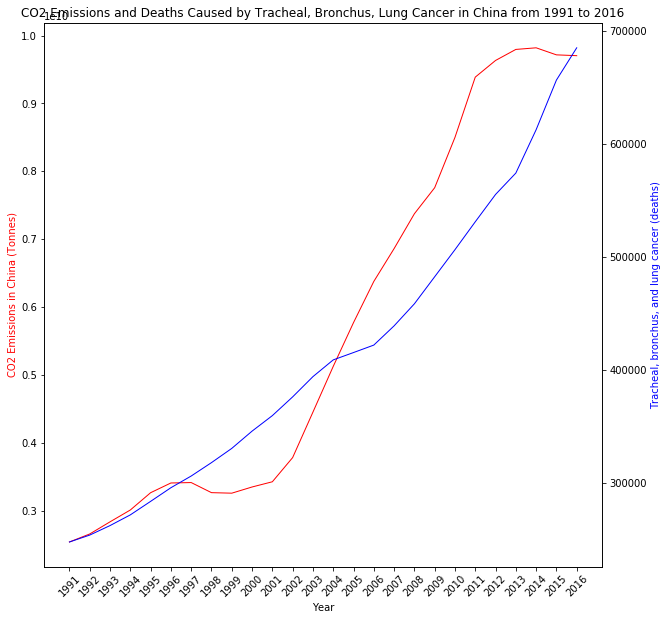

In [59]:
# Plot both CO2 emission and lung cancer deaths data for China in one graph
years = np.arange(1991, 2017, 1)

years_label = []
for year in years:
    years_label.append(year)

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.plot(years, CO2_emission_china["CO2 emissions (tonnes)"],
        color="red", linewidth=1)
ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 Emissions in China (Tonnes)", color="red")
ax1.set_xticks(years_label)
ax1.set_xticklabels(years_label, rotation=45)

ax2 = ax1.twinx()

ax2.plot(years, lung_cancer_deaths_china["Tracheal, bronchus, and lung cancer (deaths)"],
        color="blue", linewidth=1)
ax2.set_ylabel("Tracheal, bronchus, and lung cancer (deaths)", color="blue")

# fig.tight_layout()
plt.title("CO2 Emissions and Deaths Caused by Tracheal, Bronchus, Lung Cancer in China from 1991 to 2016")
plt.show()
